In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/FixLab/Desktop/project/Amazon-Products.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/FixLab/Desktop/project/Amazon-Products.csv'

In [ ]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [ ]:
df.tail()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN
551584,1103,Mothercare Printed Cotton Elastane Girls Infan...,sports & fitness,Yoga,https://m.media-amazon.com/images/I/814X-sI3DB...,https://www.amazon.in/Mothercare-Carrot-Regula...,4.6,5,"₹1,039","₹1,299"


In [ ]:
df.shape

(551585, 10)

In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [ ]:
df.isna().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [ ]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0         0.000000
name               0.000000
main_category      0.000000
sub_category       0.000000
image              0.000000
link               0.000000
ratings           31.870700
no_of_ratings     31.870700
discount_price    11.088590
actual_price       3.229421
dtype: float64

In [ ]:
df['name'].unique()

array(['Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1 Convertible, Copper, Anti-Viral + Pm 2.5 Filter, 2023 Model, White, Gls18I3...',
       'LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protectio...',
       'LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Copper, Super Convertible 6-In-1 Cooling, Hd Filter With Anti Virus Protection,...',
       ..., 'Redwolf Noice Toit Smort - Hoodie (Black)',
       'Redwolf Schrute Farms B&B - Hoodie (Navy Blue)',
       'Mothercare Printed Cotton Elastane Girls Infant Leggings (S21VF342MU-P)'],
      dtype=object)

In [ ]:
df['main_category'].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

<Axes: xlabel='count', ylabel='main_category'>

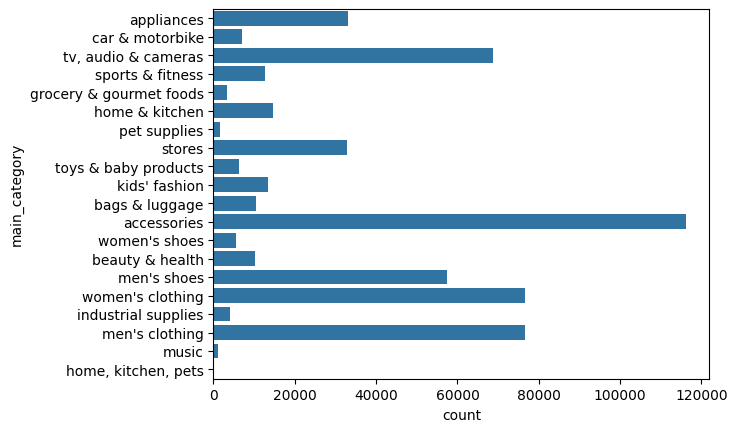

In [ ]:
sns.countplot(y='main_category',data=df)

In [ ]:
df['sub_category'].unique()

array(['Air Conditioners', 'All Appliances',
       'All Car & Motorbike Products', 'All Electronics',
       'All Exercise & Fitness', 'All Grocery & Gourmet Foods',
       'All Home & Kitchen', 'All Pet Supplies',
       'All Sports, Fitness & Outdoors', 'Amazon Fashion',
       'Baby Bath, Skin & Grooming', 'Baby Fashion', 'Baby Products',
       'Backpacks', 'Badminton', 'Bags & Luggage', 'Ballerinas',
       'Beauty & Grooming', 'Bedroom Linen', 'Camera Accessories',
       'Cameras', 'Camping & Hiking', 'Car & Bike Care',
       'Car Accessories', 'Car Electronics', 'Car Parts',
       'Cardio Equipment', 'Casual Shoes', 'Clothing',
       'Coffee, Tea & Beverages', 'Cricket', 'Cycling', 'Diapers',
       'Diet & Nutrition', 'Dog supplies', 'Ethnic Wear',
       'Fashion & Silver Jewellery', 'Fashion Sales & Deals',
       'Fashion Sandals', 'Fitness Accessories', 'Football',
       'Formal Shoes', 'Furniture', 'Garden & Outdoors',
       'Gold & Diamond Jewellery', 'Handbags & C

In [ ]:
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [ ]:
df['ratings']=df['ratings'].replace(to_replace=['Get','FREE','₹68.99',"₹65",'₹70','₹100','₹99','₹2.99'],value=np.nan)
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0', '1.4',
       '2.1', '1.2', '1.3', '1.5', '1.1'], dtype=object)

In [ ]:
df['ratings']=df['ratings'].astype(float)

In [ ]:
df['no_of_ratings'].unique()

array(['2,255', '2,948', '1,206', ..., '3,329', '7,141', '4,406'],
      dtype=object)

In [ ]:
df['no_of_ratings']=df['no_of_ratings'].str.replace(',',"")
df['no_of_ratings'].value_counts()

no_of_ratings
1        39816
2        24737
3        18105
4        14376
5        11645
         ...  
5603         1
55051        1
3329         1
7141         1
4032         1
Name: count, Length: 8342, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         369558 non-null  float64
 7   no_of_ratings   375791 non-null  object 
 8   discount_price  490422 non-null  object 
 9   actual_price    533772 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 42.1+ MB


In [ ]:
df['no_of_ratings']=pd.to_numeric(df['no_of_ratings'],errors='coerce')


In [ ]:
df['discount_price'].unique()

array(['₹32,999', '₹46,490', '₹34,490', ..., '₹3,712.10', '₹1,429.60',
       '₹651.01'], dtype=object)

In [ ]:
df['actual_price'].unique()

array(['₹58,990', '₹75,990', '₹61,990', ..., '₹608.97', '₹4,792',
       '₹8,023.60'], dtype=object)

In [ ]:
for i in ['discount_price','actual_price']:
    df[i]=df[i].str[1:]
    df[i]=df[i].str.replace(',',"")
    df[i]=pd.to_numeric(df[i],errors='coerce')
print(df[['discount_price','actual_price']].head(5))

   discount_price  actual_price
0         32999.0       58990.0
1         46490.0       75990.0
2         34490.0       61990.0
3         37990.0       68990.0
4         34490.0       67790.0


In [ ]:
df.dtypes

Unnamed: 0          int64
name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object

In [ ]:
df.isna().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           182027
no_of_ratings     182027
discount_price     61163
actual_price       17813
dtype: int64

In [ ]:
for i in ['ratings','no_of_ratings','discount_price','actual_price']:
  df[i]=df[i].fillna(df[i].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         551585 non-null  float64
 7   no_of_ratings   551585 non-null  float64
 8   discount_price  551585 non-null  float64
 9   actual_price    551585 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 42.1+ MB


In [ ]:
def image_ID(url):
    return url.split('images/')[-1].split('._AC_UL320_.jpg')[0]

df['image_link'] = "https://m.media-amazon.com/images/" + df['image'].apply(image_ID) + "._AC_UL800_.jpg"

image_links = df['image_link'].sample(13, random_state=6).tolist()

for i in image_links:
    print(i)

https://m.media-amazon.com/images/I/81wjxoQv6gL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/719cYO9R6VL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/81hxyDkV1ZL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/61VhG-OyAUL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/31qYTkgja8L._AC_UL800_.jpg
https://m.media-amazon.com/images/I/51Mo+9FL5SL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/81U9uSEFXqL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/71QPTVl4BSL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/71crG1mxBCL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/71bRUQMX0+L._AC_UL800_.jpg
https://m.media-amazon.com/images/I/717B0KCuucL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/61-+g0BjREL._AC_UL800_.jpg
https://m.media-amazon.com/images/I/61fj8JKaDQL._AC_UL800_.jpg


In [ ]:
df.drop(df[['Unnamed: 0','image']],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            551585 non-null  object 
 1   main_category   551585 non-null  object 
 2   sub_category    551585 non-null  object 
 3   link            551585 non-null  object 
 4   ratings         551585 non-null  float64
 5   no_of_ratings   551585 non-null  float64
 6   discount_price  551585 non-null  float64
 7   actual_price    551585 non-null  float64
 8   image_link      551585 non-null  object 
dtypes: float64(4), object(5)
memory usage: 37.9+ MB


In [ ]:
df['description']=df['name'] + df['main_category'] + df['sub_category']
df['description']

0         Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...
1         LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...
2         LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...
3         LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...
4         Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...
                                ...                        
551580    Adidas Regular Fit Men's Track Topssports & fi...
551581    Redwolf Noice Toit Smort - Hoodie (Black)sport...
551582    Redwolf Schrute Farms B&B - Hoodie (Navy Blue)...
551583                  Puma Men Shortssports & fitnessYoga
551584    Mothercare Printed Cotton Elastane Girls Infan...
Name: description, Length: 551585, dtype: object

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FixLab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FixLab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
df['description']=df['description'].apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
df['description']

0         Lloyd 1.5 Ton 3 Star Inverter Split Ac ( 5 In ...
1         LG 1.5 Ton 5 Star AI DUAL Inverter Split AC ( ...
2         LG 1 Ton 4 Star Ai Dual Inverter Split Ac ( Co...
3         LG 1.5 Ton 3 Star AI DUAL Inverter Split AC ( ...
4         Carrier 1.5 Ton 3 Star Inverter Split AC ( Cop...
                                ...                        
551580    Adidas Regular Fit Men's Track Topssports & fi...
551581    Redwolf Noice Toit Smort - Hoodie ( Black ) sp...
551582    Redwolf Schrute Farms B & B - Hoodie ( Navy Bl...
551583                  Puma Men Shortssports & fitnessYoga
551584    Mothercare Printed Cotton Elastane Girls Infan...
Name: description, Length: 551585, dtype: object

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
df['description']=df['description'].apply(lambda x:[j.lower() for j in tk.tokenize(x) if j not in sw]).apply(lambda x:' '.join(x))
df['description']

0         lloyd 1.5 ton 3 star inverter split ac ( 5 in ...
1         lg 1.5 ton 5 star ai dual inverter split ac ( ...
2         lg 1 ton 4 star ai dual inverter split ac ( co...
3         lg 1.5 ton 3 star ai dual inverter split ac ( ...
4         carrier 1.5 ton 3 star inverter split ac ( cop...
                                ...                        
551580    adidas regular fit men's track topssports & fi...
551581    redwolf noice toit smort - hoodie ( black ) sp...
551582    redwolf schrute farms b & b - hoodie ( navy bl...
551583                  puma men shortssports & fitnessyoga
551584    mothercare printed cotton elastane girls infan...
Name: description, Length: 551585, dtype: object

In [ ]:
df['description']=df['description'].apply(lambda x:' '.join([w for w in tk.tokenize(x) if len (w)>=3]))
df['description']

0         lloyd 1.5 ton star inverter split convertible ...
1         1.5 ton star dual inverter split copper super ...
2         ton star dual inverter split copper super conv...
3         1.5 ton star dual inverter split copper super ...
4         carrier 1.5 ton star inverter split copper est...
                                ...                        
551580    adidas regular fit men's track topssports fitn...
551581    redwolf noice toit smort hoodie black sports f...
551582    redwolf schrute farms hoodie navy blue sports ...
551583                    puma men shortssports fitnessyoga
551584    mothercare printed cotton elastane girls infan...
Name: description, Length: 551585, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

def content_based(df,item,top_n=10):
  if item not in df['name'].values:
    print(f"Item'{item}'not found in the Products list")
    return pd.DataFrame()

  vec=TfidfVectorizer()
  data=vec.fit_transform(df['description'])
  nn=NearestNeighbors(n_neighbors=top_n+1,metric= 'cosine', algorithm='brute')
  nn.fit(data)

  item_index=df[df['name']==item].index[0]
  distances,indices= nn.kneighbors(data[item_index])

  rec_indices=indices.flatten()[1:]
  details=df.iloc[rec_indices][['name','ratings','no_of_ratings','discount_price','actual_price','image_link','link']]

  return details

In [ ]:
df['name'][100]

'Hitachi 1.5 Ton 5 Star Inverter Split AC (Copper, Dust Filter, 2022 Model, RSRG518HFEOZ1, White)'

In [ ]:
item='LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protectio...'
rec_=content_based(df,item,top_n=10)

rec_

,name,ratings,no_of_ratings,discount_price,actual_price,image_link,link
35,LG 0.8 Ton 3 Star AI DUAL Inverter Split AC (C...,3.3,22.0,30490.0,57990.0,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...
22,LG 1.5 Ton 4 Star AI DUAL Inverter Split AC (C...,4.0,258.0,42490.0,71990.0,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...
233,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,4.3,485.0,45490.0,76990.0,https://m.media-amazon.com/images/I/61uVPS3AaW...,https://www.amazon.in/LG-Convertible-Anti-Viru...
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,4.0,69.0,37990.0,68990.0,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...
317,LG 1.5 Ton 5 Star with UV Nano Inverter Split ...,4.4,66.0,499.0,999.0,https://m.media-amazon.com/images/I/51lyOjfKhM...,https://www.amazon.in/LG-Inverter-Convertible-...
101,LG 1.5 Ton 3 Star DUAL Inverter Split AC (Copp...,4.1,926.0,38890.0,55990.0,https://m.media-amazon.com/images/I/51hbo8yQ1E...,https://www.amazon.in/LG-Convertible-Anti-Viru...
173,LG 1.5 Ton 4 Star DUAL Inverter Split AC (Copp...,4.2,622.0,43890.0,59990.0,https://m.media-amazon.com/images/I/51hbo8yQ1E...,https://www.amazon.in/LG-Convertible-Anti-Viru...
160,LG 1 Ton 3 Star DUAL Inverter Split AC (Copper...,4.1,200.0,37890.0,75990.0,https://m.media-amazon.com/images/I/51hbo8yQ1E...,https://www.amazon.in/LG-Convertible-Anti-Viru...
804,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,4.2,2948.0,46490.0,75990.0,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...
1222,LG 1.5 Ton 4 Star AI DUAL Inverter Split AC (C...,4.0,258.0,42490.0,71990.0,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...


In [ ]:
def keyword_based(keyword):
    products = df[df['description'].str.contains(keyword, na=False)]
    pdt_details=products[['name','ratings','no_of_ratings','discount_price','actual_price']]

    return products

In [ ]:
recommendation=keyword_based('nail polish')

recommendation

,name,main_category,sub_category,link,ratings,no_of_ratings,discount_price,actual_price,image_link,description
26448,"Colorbar Nail Polish Remover, 110ml",stores,Amazon Fashion,https://www.amazon.in/Colorbar-Nail-Polish-Rem...,4.5,22133.0,109.0,145.0,https://m.media-amazon.com/images/I/615XARbwNn...,colorbar nail polish remover 110mlstoresamazon...
29681,"JD Fresh Electric Baby Nail Trimmer New Born, ...",toys & baby products,"Baby Bath, Skin & Grooming",https://www.amazon.in/JD-Electric-Trimmer-Groo...,3.5,331.0,499.0,999.0,https://m.media-amazon.com/images/I/31i+TNRT7b...,fresh electric baby nail trimmer new born baby...
29712,"XIVUMN Baby Electric Nail Trimmer, Newborn Nai...",toys & baby products,"Baby Bath, Skin & Grooming",https://www.amazon.in/XIVUMN-Trimmer-Clipper-E...,3.4,15.0,599.0,1599.0,https://m.media-amazon.com/images/I/61ANgKuHIT...,xivumn baby electric nail trimmer newborn nail...
30011,"NewSpace™ Electric Baby Nail Trimmer New Born,...",toys & baby products,"Baby Bath, Skin & Grooming",https://www.amazon.in/NewSpaceTM-Electric-Trim...,1.0,1.0,699.0,999.0,https://m.media-amazon.com/images/I/31qpdLxJFw...,newspace electric baby nail trimmer new born b...
57278,"Colorbar Nail Polish Remover, 110ml",beauty & health,Beauty & Grooming,https://www.amazon.in/Colorbar-Nail-Polish-Rem...,4.5,22133.0,109.0,145.0,https://m.media-amazon.com/images/I/615XARbwNn...,colorbar nail polish remover 110mlbeauty healt...
58068,Chelsy Nail Polish Remover Wipes- (30 Pads) x ...,beauty & health,Beauty & Grooming,https://www.amazon.in/Chelsy-Polish-Remover-Al...,4.3,416.0,149.0,150.0,https://m.media-amazon.com/images/I/41Kmba8g2N...,chelsy nail polish remover wipes pads box aloe...
58203,Fabskin Cosmetic Cotton Balls For Skin Cleanin...,beauty & health,Beauty & Grooming,https://www.amazon.in/Cosmetic-Cleaning-Applyi...,4.5,4.0,99.0,125.0,https://m.media-amazon.com/images/I/61BYeRwszK...,fabskin cosmetic cotton balls for skin cleanin...
58217,"6pcs Nail Files Set for Manicure, Nail Buffer ...",beauty & health,Beauty & Grooming,https://www.amazon.in/MAYCREATE%C2%AE-Washable...,4.2,337.0,381.0,541.0,https://m.media-amazon.com/images/I/71nqqKBh2c...,6pcs nail files set manicure nail buffer files...
58226,"Makeup Mania Nail Polish Set of 24 Pcs, Nail P...",beauty & health,Beauty & Grooming,https://www.amazon.in/Makeup-Mania-Exclusive-P...,3.9,1444.0,500.0,792.0,https://m.media-amazon.com/images/I/81hto65k0o...,makeup mania nail polish set pcs nail paint 6m...
58364,"DeBelle Top & Base Coat, Transparent Nail Poli...",beauty & health,Beauty & Grooming,https://www.amazon.in/DeBelle-Top-Base-Coat-15...,4.2,183.0,425.0,525.0,https://m.media-amazon.com/images/I/61vRRXowzB...,debelle top base coat transparent nail polish ...


In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))

In [ ]:
pickle.load(open('df.pkl','rb'))

,name,main_category,sub_category,link,ratings,no_of_ratings,discount_price,actual_price,image_link,description
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,https://m.media-amazon.com/images/I/31UISB90sY...,lloyd 1.5 ton star inverter split convertible ...
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,https://m.media-amazon.com/images/I/51JFb7FctD...,1.5 ton star dual inverter split copper super ...
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,https://m.media-amazon.com/images/I/51JFb7FctD...,ton star dual inverter split copper super conv...
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0,https://m.media-amazon.com/images/I/51JFb7FctD...,1.5 ton star dual inverter split copper super ...
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0,https://m.media-amazon.com/images/I/41lrtqXPiW...,carrier 1.5 ton star inverter split copper est...
...,...,...,...,...,...,...,...,...,...,...
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9.0,3449.0,4599.0,https://m.media-amazon.com/images/I/71tHAR9pIY...,adidas regular fit men's track topssports fitn...
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2.0,1199.0,1999.0,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,redwolf noice toit smort hoodie black sports f...
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1.0,1199.0,1999.0,https://m.media-amazon.com/images/I/41n9u+zNSc...,redwolf schrute farms hoodie navy blue sports ...
551583,Puma Men Shorts,sports & fitness,Yoga,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37.0,499.0,999.0,https://m.media-amazon.com/images/I/51LoWv5JDt...,puma men shortssports fitnessyoga


In [ ]:
df.to_csv('df.csv', index=False)

